Text(0, 0.5, 'Genres')

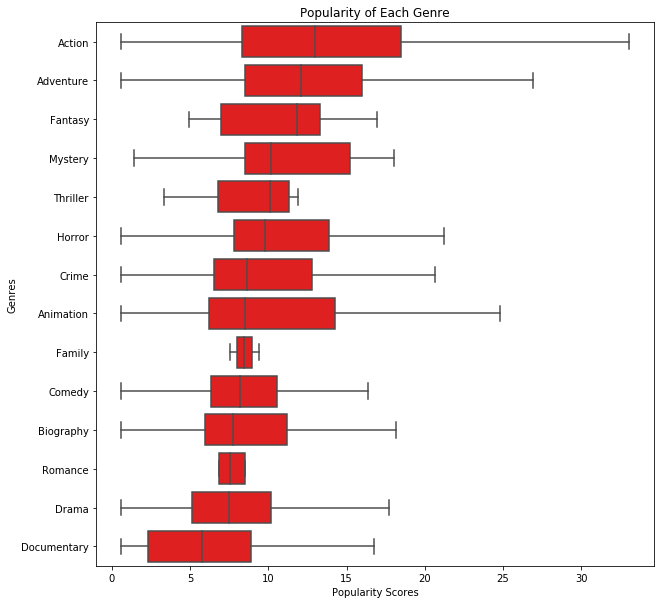

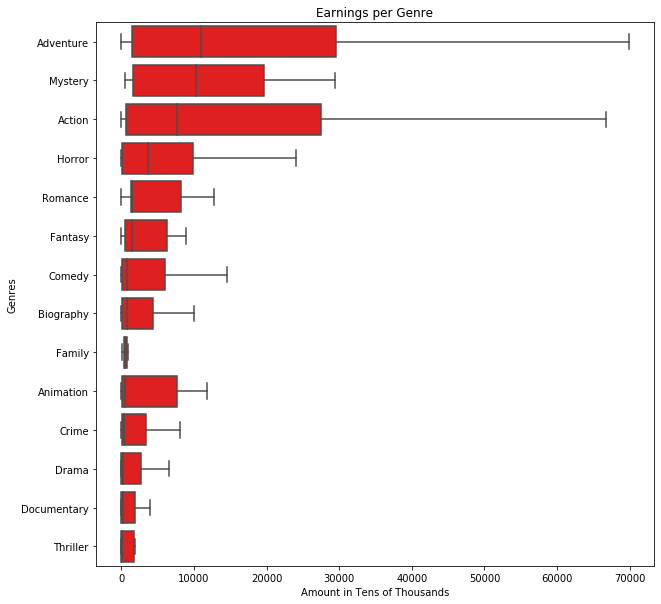

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('bom.movie_gross.csv')
movies = pd.read_csv('imdb.title.basics.csv.gz')
popularity = pd.read_csv('tmdb.movies.csv.gz')

# this is to fill NA values so I can add gross columns together for each movie
values = {'domestic_gross': 0, 'foreign_gross': 0}
df = df.fillna(value=values)

# reassign billion dollar movies to values in billions
df.at[1872, 'foreign_gross'] = 1131600000
df.at[1873, 'foreign_gross'] = 1019400000
df.at[1874, 'foreign_gross'] = 1163000000
df.at[2760, 'foreign_gross'] = 1010000000
df.at[3079, 'foreign_gross'] = 1369500000

# make all foreign_gross values an integer
df['foreign_gross'] = df['foreign_gross'].astype(int)
df['total_gross'] = df['foreign_gross'] + df['domestic_gross']

# drop all columns but title and total_gross and retrieve the first 100 most grossed movies
df = df.drop(['studio', 'domestic_gross', 'foreign_gross', 'year'], axis=1)

# make all total_gross numbers display without 'e'
# pd.options.display.float_format = "{:.2f}".format

# organize from most profittable to least
df = df.nlargest(4000, columns='total_gross')


movies = movies.drop(
    columns=['original_title', 'runtime_minutes', 'start_year', 'tconst'])
movies.rename(columns={'primary_title': 'title'}, inplace=True)

# combined tables with 'title', 'total_gross', 'genre_ids', 'popularity'
two_tables = pd.merge(df, movies, on='title', how='inner')
# drop unnecessary columns
two_tables

# make a dataframe for 'popularity'
popularity = popularity.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'original_language',
                                      'original_title', 'release_date', 'vote_average', 'vote_count'])
popularity

# combine 'two_tables' with 'popularity'
combined_data = pd.merge(two_tables, popularity, on='title', how='inner')
combined_data

# take out duplicate title, used the last title because it had the highest popularity, the total_gross was the same
combined_data['title'] = combined_data.title.drop_duplicates(keep='last')
combined_data = combined_data.dropna(subset=['title'], axis=0, how='any')
combined_data

# Locate any na values in data
combined_data.isna().any()
combined_data.loc[combined_data['genres'].isnull()]

# alter data in column to appropriate values
combined_data.at[304, 'genres'] = 'Action, Sci-Fi'
combined_data.at[3240, 'genres'] = 'Comedy'
combined_data.at[3093, 'genres'] = 'Drama'
combined_data.at[2618, 'genres'] = 'Drama, Romance'
combined_data.at[2388, 'genres'] = 'Crime, Drama'
combined_data.at[2347, 'genres'] = 'Drama, Thriller'
combined_data.at[2182, 'genres'] = 'Drama, Thriller'
combined_data.at[2049, 'genres'] = 'Drama'
combined_data.at[1797, 'genres'] = 'Animation, Family'
combined_data.at[1411, 'genres'] = 'Drama, Horror'
combined_data.at[1280, 'genres'] = 'Comedy, Romance'
combined_data.at[752, 'genres'] = 'Action, Sci-Fi'
combined_data.at[661, 'genres'] = 'Action, Thriller'
combined_data.at[643, 'genres'] = 'Comedy, Romance'
combined_data.at[553, 'genres'] = 'Thriller, Drama'
combined_data.at[62, 'genres'] = 'Animation, Comedy'

# seperate all genres
u = str(set(list(combined_data['genres'])))
u.count('Adventure')
combined_data["genres"] = combined_data["genres"].str.split(
    ",", n=1, expand=True)

# some movies are so small it is not worth representing so we'll tak those movie types out
combined_data = combined_data[combined_data.genres != 'History']
combined_data = combined_data[combined_data.genres != 'Sci-Fi']
combined_data = combined_data[combined_data.genres != 'Sport']
combined_data = combined_data[combined_data.genres != 'Western']

# change total_gross values to values in millions and rename it
combined_data['total_gross'] = combined_data['total_gross'].map(
    lambda x: int(x))
combined_data['total_gross'] = combined_data['total_gross'].map(
    lambda x: x / 10000)
combined_data = combined_data.rename(
    columns={'total_gross': "total_gross_in_ten_thousands's"})


# graph 1
my_order = combined_data.groupby(by=["genres"])[
    "popularity"].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
sns.boxplot(x='popularity', y='genres', order=my_order, data=combined_data.nlargest(
    4000, 'popularity'), color='r', showfliers=False)
plt.title("Popularity of Each Genre")
plt.xlabel("Popularity Scores")
plt.ylabel("Genres")

# graph 2
my_order2 = combined_data.groupby(by=["genres"])[
    "total_gross_in_ten_thousands's"].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
sns.boxplot(x="total_gross_in_ten_thousands's", y='genres', order=my_order2, data=combined_data.nlargest(
    4000, "total_gross_in_ten_thousands's"), color='r', showfliers=False)
plt.title("Earnings per Genre")
plt.xlabel("Amount in Tens of Thousands")
plt.ylabel("Genres")


# combined_data

In [2]:
combined_data

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.00,Action,80.773
1,Jurassic World,167170.00,Action,20.709
2,Furious 7,151600.00,Action,20.396
3,Avengers: Age of Ultron,140540.00,Action,44.383
5,Black Panther,134700.00,Action,44.140
...,...,...,...,...
3767,Into the White,0.07,Biography,7.072
3768,Death of a Superhero,0.06,Animation,5.158
3769,2:22,0.04,Thriller,11.316
3770,Satanic,0.03,Horror,6.403


In [3]:
combined_data.nlargest(20, 'popularity')

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.0,Action,80.773
876,John Wick,8870.0,Action,78.123
37,The Hobbit: The Battle of the Five Armies,95600.0,Adventure,53.783
83,Guardians of the Galaxy,77340.0,Action,49.606
354,Blade Runner 2049,25930.0,Drama,48.571
111,Fantastic Beasts: The Crimes of Grindelwald,65370.0,Adventure,48.508
154,Ralph Breaks the Internet,52920.0,Adventure,48.057
41,Spider-Man: Homecoming,88020.0,Action,46.775
124,Ant-Man and the Wasp,62260.0,Action,44.729
3,Avengers: Age of Ultron,140540.0,Action,44.383


In [5]:
combined_data.nlargest(20, "total_gross_in_ten_thousands's")

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.0,Action,80.773
1,Jurassic World,167170.0,Action,20.709
2,Furious 7,151600.0,Action,20.396
3,Avengers: Age of Ultron,140540.0,Action,44.383
5,Black Panther,134700.0,Action,44.140
7,Star Wars: The Last Jedi,133260.0,Action,34.293
8,Jurassic World: Fallen Kingdom,130950.0,Action,34.958
14,Frozen,127640.0,Adventure,26.183
15,Incredibles 2,124280.0,Action,36.286
16,The Fate of the Furious,123600.0,Action,28.668
